<a href="https://colab.research.google.com/github/ryokobayashi0819/code_note_quiz_2/blob/main/414_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [131]:
baseball = pd.read_csv('baseball.csv')
baseball.head()

,Unnamed: 0,season,opponent,event_id,event_date,event_time,win,attendance,tickets_sold,tickets_resale,opponent_payroll,opponent_rank,opponent_win_pcnt,braves_payroll,braves_rank,braves_win_pcnt,weekday,is_night
0,1,2011,Arizona Diamondbacks,6347,2011-08-20,19:10:00,1,31147,39783,5052,53.639833,28,0.401,87.003192,7,0.562,Saturday,1
1,2,2011,Arizona Diamondbacks,6348,2011-08-21,13:35:00,1,24645,35274,2425,53.639833,28,0.401,87.003192,7,0.562,Sunday,0
2,3,2011,Arizona Diamondbacks,6346,2011-08-19,19:35:00,1,23327,30599,3078,53.639833,28,0.401,87.003192,7,0.562,Friday,1
3,4,2011,Baltimore Orioles,6323,2011-07-02,19:10:00,1,33468,38766,6759,85.304038,27,0.407,87.003192,7,0.562,Saturday,1
4,5,2011,Baltimore Orioles,6324,2011-07-03,13:35:00,0,18801,24580,2415,85.304038,27,0.407,87.003192,7,0.562,Sunday,0


In [132]:
weather = pd.read_csv('weather.csv')
weather.head()

,date,mean_temp,weather
0,2011-01-01,15,Rain
1,2011-01-02,7,Rain
2,2011-01-03,3,Sunny
3,2011-01-04,8,Sunny
4,2011-01-05,6,Rain


In [133]:
df = baseball.join(weather.set_index('date'), on = 'event_date', how = 'left')
df['log_tickets_resale'] = np.log(df['tickets_sold'])
df['weather'] = df['weather'].astype('category')
df['opponent'] = df['opponent'].astype('category')
df['event_time'] = df['event_time'].astype('category')
df['opponent_rank'] = df['opponent_rank'].astype('category')
df['braves_rank'] = df['braves_rank'].astype('category')
df['is_night'] = df['is_night'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['weekday'] = df['weekday'].cat.reorder_categories(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          461 non-null    int64   
 1   season              461 non-null    int64   
 2   opponent            461 non-null    category
 3   event_id            461 non-null    int64   
 4   event_date          461 non-null    object  
 5   event_time          461 non-null    category
 6   win                 461 non-null    int64   
 7   attendance          461 non-null    int64   
 8   tickets_sold        461 non-null    int64   
 9   tickets_resale      461 non-null    int64   
 10  opponent_payroll    461 non-null    float64 
 11  opponent_rank       461 non-null    category
 12  opponent_win_pcnt   461 non-null    float64 
 13  braves_payroll      461 non-null    float64 
 14  braves_rank         461 non-null    category
 15  braves_win_pcnt     461 non-null    floa

,Unnamed: 0,season,opponent,event_id,event_date,event_time,win,attendance,tickets_sold,tickets_resale,...,opponent_rank,opponent_win_pcnt,braves_payroll,braves_rank,braves_win_pcnt,weekday,is_night,mean_temp,weather,log_tickets_resale
0,1,2011,Arizona Diamondbacks,6347,2011-08-20,19:10:00,1,31147,39783,5052,...,28,0.401,87.003192,7,0.562,Saturday,1,29,Rain,10.591195
1,2,2011,Arizona Diamondbacks,6348,2011-08-21,13:35:00,1,24645,35274,2425,...,28,0.401,87.003192,7,0.562,Sunday,0,28,Rain,10.470901
2,3,2011,Arizona Diamondbacks,6346,2011-08-19,19:35:00,1,23327,30599,3078,...,28,0.401,87.003192,7,0.562,Friday,1,29,Sunny,10.328723
3,4,2011,Baltimore Orioles,6323,2011-07-02,19:10:00,1,33468,38766,6759,...,27,0.407,87.003192,7,0.562,Saturday,1,29,Rain,10.565299
4,5,2011,Baltimore Orioles,6324,2011-07-03,13:35:00,0,18801,24580,2415,...,27,0.407,87.003192,7,0.562,Sunday,0,29,Rain,10.109688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,457,2016,St. Louis Cardinals,12884,2016-04-08,19:35:00,0,21350,26230,2522,...,1,0.617,87.622648,28,0.414,Friday,1,13,Rain,10.174659
457,458,2016,St. Louis Cardinals,12885,2016-04-09,19:10:00,0,29564,35139,2953,...,1,0.617,87.622648,28,0.414,Saturday,1,12,Sunny,10.467067
458,459,2016,St. Louis Cardinals,12886,2016-04-10,13:35:00,0,19625,24723,2269,...,1,0.617,87.622648,28,0.414,Sunday,0,11,Sunny,10.115489
459,460,2016,Washington Nationals,12882,2016-04-04,16:10:00,0,42107,49949,4981,...,13,0.512,87.622648,28,0.414,Monday,0,17,Sunny,10.818758


In [152]:
df_train = df.query('season < 2015')
df_test = df.query('season >= 2015')

# **Building Models**

1. We identified every possible variable in the data that may help predict attendance. They are "opponent," "event_time," "tickets_sold," "tickets_resale," "opponent_rank," "opponent_win_pcnt," "braves_rank," "braves_win_pcnt," "weekday," "is_night" (excluding mean_temp and weather as we analyze them in the next section). 

2. We tested each variable one by one to see the relationship with attendance. Adding variables to our model will always increase the R-squared, but it does not necessarily mean that the prediction accuracy will also improve. Therefore, in order to choose the right variables, we narrowed them down to the ones that have Adj. R-squared > 20%. They are "event_time," "tickets_sold," "log_tickets_resale," and "weekday" (for "tickets_resale," we took a log to make it comparable). 




**Model 1 (use all the variables we identified)**

In [153]:
model_1 = smf.ols(data = df_train, formula = 'attendance ~ log_tickets_resale + tickets_sold + weekday + event_time').fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             attendance   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     254.1
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          5.81e-180
Time:                        05:52:35   Log-Likelihood:                -2939.3
No. Observations:                 324   AIC:                             5925.
Df Residuals:                     301   BIC:                             6012.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.63

**Model 2 (exclude event_time)**

In [158]:
model_2 = smf.ols(data = df_train, formula = 'attendance ~ log_tickets_resale + tickets_sold + weekday').fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             attendance   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     307.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          1.69e-183
Time:                        05:56:00   Log-Likelihood:                -2942.8
No. Observations:                 324   AIC:                             5924.
Df Residuals:                     305   BIC:                             5995.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.20

**Model 3 (exclude weekday)**

In [163]:
model_3 = smf.ols(data = df_train, formula = 'attendance ~ log_tickets_resale + tickets_sold + event_time').fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             attendance   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     307.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          1.69e-183
Time:                        05:58:50   Log-Likelihood:                -2942.8
No. Observations:                 324   AIC:                             5924.
Df Residuals:                     305   BIC:                             5995.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.20

**Model 4 (weather condition)**

In [164]:
model_4 = smf.ols(data = df_train, formula = 'attendance ~ weather').fit()
print(model_4.summary())
model_4 = smf.ols(data = df_train, formula = 'attendance ~ mean_temp').fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:             attendance   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2929
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.746
Time:                        05:59:22   Log-Likelihood:                -3420.8
No. Observations:                 324   AIC:                             6848.
Df Residuals:                     321   BIC:                             6859.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.637e+04   3307.998  

Analysis regarding the weather conditions

* We can see that both R-squared is less than 5%. This means that less than 5% of the variation in attendance is explained by the weather or mean_temp. 

* Also, if we take a look at the p-values for the weather (rain), weather (sunny), and mean_temp, all of them have a p-value > 0.05. This means that those variables are NOT strong predictors for attendance.

* Therefore, the weather condition is not affecting attendance.

# **Chosen Model & Formula**

* As we can see, the Adj. R-squared is almost identical across all three models. Also, having even_time makes it hard to interpret the model. Therefore, we have decided to choose model 2.

Formula is as follows


attendance = 2.236e+04 + 13.9250 * Tuesday + 366.8608 * Wednesday - 37.1863 * Thursday + 1362.5200 * Friday + 1221.6258 * Saturday + 379.2573 * Sunday - 2997.7142 * log_tickets_resale + 1.0259 * tickets_sold

In [165]:
X_test = df_test.loc[:, ['log_tickets_resale', 'tickets_sold', 'weekday']]
y_test_predicted = model_2.predict(X_test)
y_test_real = df_test['attendance']

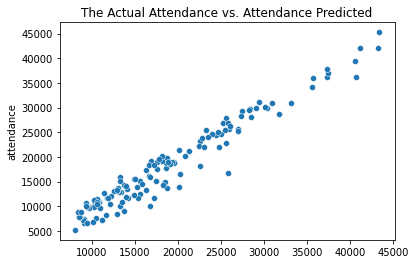

In [167]:
plt = sns.scatterplot(x = y_test_predicted, y = y_test_real).set_title('The Actual Attendance vs. Attendance Predicted')

** Add Comments here!!!!**


# **Predicitng Win / Loss**

In [171]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, shuffle = True)

,Unnamed: 0,season,opponent,event_id,event_date,event_time,win,attendance,tickets_sold,tickets_resale,...,opponent_rank,opponent_win_pcnt,braves_payroll,braves_rank,braves_win_pcnt,weekday,is_night,mean_temp,weather,log_tickets_resale
359,360,2015,New York Mets,11543,2015-06-21,17:05:00,1,25129,32187,2328,...,17,0.488,97.578565,16,0.488,Sunday,0,28,Sunny,10.379318
246,247,2014,Boston Red Sox,10511,2014-05-27,19:10:00,0,33483,38841,4385,...,1,0.599,110.897341,3,0.593,Tuesday,1,24,Sunny,10.567232
166,167,2013,Chicago Cubs,8990,2013-04-05,19:30:00,1,28725,34915,2898,...,29,0.377,89.778192,6,0.580,Friday,1,12,Rain,10.460672
42,43,2011,New York Mets,6315,2011-06-16,19:10:00,1,20453,27354,1746,...,20,0.488,87.003192,7,0.562,Thursday,1,26,Rain,10.216618
38,39,2011,New York Mets,6314,2011-06-15,19:10:00,0,25589,32001,2282,...,20,0.488,87.003192,7,0.562,Wednesday,1,27,Rain,10.373522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,2011,Los Angeles Dodgers,6353,2011-09-03,19:10:00,0,27828,38033,5292,...,19,0.494,87.003192,7,0.562,Saturday,1,29,Sunny,10.546209
326,327,2015,Arizona Diamondbacks,11564,2015-08-15,19:10:00,0,21991,31364,2120,...,30,0.395,97.578565,16,0.488,Saturday,1,27,Sunny,10.353416
234,235,2013,Washington Nationals,8995,2013-04-29,19:10:00,1,19499,24233,1727,...,1,0.605,89.778192,6,0.580,Monday,1,19,Rain,10.095471
157,158,2012,Washington Nationals,7556,2012-09-15,16:05:00,1,34310,41495,5663,...,15,0.497,83.309942,10,0.549,Saturday,0,26,Sunny,10.633328


**Model 1 (variables: how much players earn)**

In [188]:
model_logit_1 = smf.logit(data = train, formula = 'win ~ braves_payroll + opponent_payroll').fit()
print(model_logit_1.summary())

Optimization terminated successfully.
         Current function value: 0.672567
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    win   No. Observations:                  322
Model:                          Logit   Df Residuals:                      319
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                 0.01640
Time:                        07:36:03   Log-Likelihood:                -216.57
converged:                       True   LL-Null:                       -220.18
Covariance Type:            nonrobust   LLR p-value:                   0.02702
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9222      1.135      1.693      0.090      -0.303       4.148
braves_payr

**Model 2 (variables: teams' performance)**

In [201]:
model_logit_2 = smf.logit(data = train, formula = 'win ~ opponent_rank + opponent_win_pcnt + braves_rank + braves_win_pcnt').fit()
print(model_logit_2.summary())

         Current function value: 0.619226
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    win   No. Observations:                  322
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           34
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                 0.09441
Time:                        07:53:11   Log-Likelihood:                -199.39
converged:                      False   LL-Null:                       -220.18
Covariance Type:            nonrobust   LLR p-value:                    0.1742
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.9630   8.25e+06   8.44e-07      1.000   -1.62e+07    1.62e+07
opponent_rank[T.2]      0.0693      0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


**Model 3 (variables: game time)**

In [191]:
model_logit_3 = smf.logit(data = train, formula = 'win ~ is_night').fit()
print(model_logit_3.summary())

Optimization terminated successfully.
         Current function value: 0.683774
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    win   No. Observations:                  322
Model:                          Logit   Df Residuals:                      320
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:               1.133e-05
Time:                        07:36:40   Log-Likelihood:                -220.18
converged:                       True   LL-Null:                       -220.18
Covariance Type:            nonrobust   LLR p-value:                    0.9437
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2877      0.212      1.358      0.174      -0.127       0.703
is_night[T.1]    -0.

**Model 4 (variables: weather conditions)**

In [193]:
model_logit_4 = smf.logit(data = train, formula = 'win ~ weather + mean_temp').fit()
print(model_logit_4.summary())

Optimization terminated successfully.
         Current function value: 0.677476
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    win   No. Observations:                  322
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            3
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                0.009221
Time:                        07:38:55   Log-Likelihood:                -218.15
converged:                       True   LL-Null:                       -220.18
Covariance Type:            nonrobust   LLR p-value:                    0.2550
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1419      1.051      0.135      0.893      -1.919       2.203
weather[T.R

**Chosen Model (variables: Players' ernings & Teams' performance)**

Note: should we removed braves_rank because it contains "nan"?

In [202]:
model_logit = smf.logit(data = train, formula = 'win ~ opponent_payroll + opponent_rank + opponent_win_pcnt + braves_payroll + braves_rank + braves_win_pcnt').fit()
print(model_logit.summary())

         Current function value: 0.612312
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    win   No. Observations:                  322
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                           36
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.1045
Time:                        07:53:34   Log-Likelihood:                -197.16
converged:                      False   LL-Null:                       -220.18
Covariance Type:            nonrobust   LLR p-value:                    0.1222
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5449   6.87e+06   2.25e-07      1.000   -1.35e+07    1.35e+07
opponent_rank[T.2]     -0.3892      0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


**!!!!**

Write down the mathematical formula for predicting the winning probability from your model.
Select  one  most  important  variable  from  your  model,  explain  how  the  winning  probability
would change if this variable changes value.


In [203]:
X = test[['opponent_payroll', 'opponent_rank', 'opponent_win_pcnt', 'braves_payroll', 'braves_rank', 'braves_win_pcnt']]
y = test['win']

In [204]:
yhat = model_logit.predict(X)
print(yhat)

165    0.762623
411    0.394031
397    0.535323
184    0.697086
315    0.648075
         ...   
405    0.315081
86     0.846982
217    0.592746
415    0.317984
2      1.000000
Length: 139, dtype: float64


In [208]:
prediction = (yhat > 0.7).astype(int)
yhat > 0.7

165     True
411    False
397    False
184    False
315    False
       ...  
405    False
86      True
217    False
415    False
2       True
Length: 139, dtype: bool

In [209]:
print('Actual values', list(y.values))
print('Predicted values', list(prediction.values))

Actual values [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]
Predicted values [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]


In [214]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

cm = confusion_matrix(y, prediction)
print("Confusion Metrix : \n", cm)
print("Test Accuracy = ", accuracy_score(y, prediction))

Confusion Metrix : 
 [[56 13]
 [47 23]]
Test Accuracy =  0.5683453237410072
